In [1]:
using CairoMakie
using Unitful
using Colors
import SpecialFunctions: erfcx
import PhysicalConstants.CODATA2018: h, k_B, c_0

custom_theme = Theme(
    Axis = (
        xgridvisible = false,  # Set grid visibility to false
        ygridvisible = false,
    ),
)
Makie.set_theme!(custom_theme)
CairoMakie.enable_only_mime!("svg")

i_units = u"kW * m^-2 * sr^-1 * nm^-1"

kW nm⁻¹ m⁻² sr⁻¹

### 1. Radiation through an isothermal layer

Consider the sketch below:


<img src="../../docs/images/layer.svg" alt="Radiation through a layer" width="500"/>

*Radiation through a layer.
    The incident intensity at the left is attenuated
    by absorption in the layer as specified by its total
    opaqueness $\tau$ (the "optical thickness" of the layer).
    The internal production of radiation $\Delta I(x)$ in a
    thin sublayer with thickness $\Delta x$
    that is added to the beam locally
    is given by the product of the Planck function 
    $B[T(x)]$ and the sublayer opaqueness $\Delta \tau(x)$;
    this contribution is then attenuated by the remainder of the layer.*


A beam of radiation with intensity $I(0)$ 
passes through a layer in which it is attenuated.
The weakened intensity that emerges on the right is given by

\begin{equation}
  I = I(0) \mathrm{e}^{-\tau},
\end{equation}

in which the decay parameter $\tau$ specifies the attenuation by absorption
in the layer.  It is a dimensionless measure of the opaqueness that is
usually called the "optical thickness" because it measures 
how thick the layer is, not in metres but in terms of its effect 
on the passing radiation.  Nothing comes through if $\tau \gg 1$
and (almost) everything comes through if $\tau \ll 1$.


The next step is to add the radiation that originates within the layer
itself. Assuming the layer is in thermodynamical equilibrium, its amount is locally equal to $\Delta I = B_\lambda(T) \, \Delta \tau$. 
The scaling with $\Delta \tau$ comes in through a Kirchhoff law 
which says that a medium radiates  better when it absorbs better (a "black" body radiates stronger
than a white one).  
This local contribution at a location $x$ 
within the layer is subsequently attenuated by
the remainder of the layer to the right,
so that its addition to the emergent beam is given by:

\begin{equation}
  \Delta I_\lambda = B_\lambda[T(x)] \,\, \Delta \tau(x) 
                \,\, \mathrm{e}^{-(\tau-\tau(x))}.
\end{equation}

The total emergent intensity is:

\begin{equation} 
  I_\lambda 
    = I_\lambda(0) \mathrm{e}^{-\tau} + \int_0^\tau
       B_\lambda[T(x)] \, \mathrm{e}^{-(\tau-\tau(x))} \mathrm{d} \tau(x)
\end{equation}

which for an isothermal layer ($T$ and therefore also $B_\lambda(T)$ independent of $x$) simplifies to:

\begin{equation}
   I_\lambda = I_\lambda(0) \mathrm{e}^{-\tau} 
        + B_\lambda \, \left( 1 - \mathrm{e}^{-\tau} \right).
\end{equation}

### 2. Spectral lines from a solar reversing layer

We will now apply the above result for an isothermal layer to a simple
model in which the spectral lines in the solar spectrum are
explained by a "reversing layer".  Cecilia Payne had this model in
mind when she plotted her Saha-Boltzmann population curves.  She
thought that her curves described the local density of the
line-causing atoms and ions within stellar reversing layers.

<img src="../../docs/images/ssmodel.svg" alt="Schuster-Schwarzschild model" width="400"/>

*The Schuster-Schwarzschild or reversing-layer model.
    The stellar surface radiates an intensity given by
    $B_\lambda(T_{\rm surface})$.
    The shell around the surface only affects this radiation at
    the wavelengths where atoms provide a bound-bound 
    transition between two discrete energy levels.
    These spectral line transitions cause attenuation 
    $\tau_\lambda$.  The layer has temperature $T_{\rm layer}$
    and gives a thermal contribution 
    $B_\lambda(T_{\rm layer})\,[1 - \exp(-\tau_\lambda)]$ .*


#### 2.1 Schuster-Schwarzschild model

The basic assumptions are that the continuous
radiation, without spectral lines, is emitted by the stellar surface
and irradiates a separate layer with the intensity 

\begin{equation}
   I_\lambda(0) = B_\lambda (T_{\rm surface}),
\end{equation}

and that this layer sits as a shell around the star and
causes attenuation and local emission *only* 
at the wavelengths of spectral lines. Thus, the shell is thought to be made up 
exclusively by line-causing atoms or ions.  

The star is optically thick (any star is optically thick!) 
so that its surface radiates with the
$\tau \gg 1$ solution $I_\lambda = B_\lambda (T_{\rm surface})$, but the shell may be optically thin or thick
at the line wavelength depending on the atom concentration.
The line-causing atoms in the shell have 
temperature $T_{\rm layer}$ so that the local 
production of radiation in the layer at the line wavelengths is given by 
$B_\lambda(T_{\rm layer})\, \Delta \tau(x)$.
The emergent radiation at the line wavelengths is then given by
the combination of previous equations:

\begin{equation} 
  I_\lambda = B_\lambda(T_{\rm surface}) \mathrm{e}^{-\tau_\lambda} 
        + B_\lambda(T_{\rm layer}) \, \left( 1 - \mathrm{e}^{-\tau_\lambda} \right).
\end{equation}


#### 2.2 The Voigt profile

The optical depth $\tau$ has an index $\lambda$ because it varies over the spectral line. When atoms absorb or emit a photon at the energy  at which the valence electron may jump between two bound
energy levels (bound electron orbits), the effect is not limited
to an infinitely sharp delta function at $\lambda$ 
with $hc/\lambda = \chi_{r,s} - \chi_{r,t}$
but it is a little bit spread out in wavelength. An obvious cause for such "line broadening" consists of the  Doppler shifts given by individual atoms due to their thermal motions. Other broadening is due to Coulomb interactions with neighboring particles. This broadening distribution is described by 

\begin{equation}
   \tau(u) = \tau(0)\,\, V(a,u)
\end{equation}

where $V$ is called the Voigt function
and $u$ measures the wavelength separation 
$\Delta \lambda = \lambda - \lambda(0)$ from the center of the line
at $\lambda = \lambda(0)$ in dimensionless units

\begin{equation} 
   u \equiv \frac{\Delta \lambda}{\Delta \lambda_\mathrm{D}},
\end{equation}

where $\Delta \lambda_\mathrm{D}$ is the "Doppler width" defined as

\begin{equation} 
  \Delta \lambda_\mathrm{D} 
     \equiv \frac{\lambda}{c}\sqrt{\frac{2 k T}{m}}
\end{equation}

with $m$ the mass of the line-causing particles (for example iron with 
$m_{\rm Fe} \approx 56 \, m_\mathrm{H} \approx 9.3 \times 10^{-26}$ kg). 
The parameter $a$ in $V(a, u)$
measures the amount of Coulomb disturbances (called "damping").
Stellar atmospheres typically have $a \approx 0.01 - 0.5$.
The Voigt function $V(a,u)$ is defined as:

\begin{equation} 
   V(a,u) \equiv \frac{1}{\Delta \lambda_\mathrm{D} \sqrt{\pi}} \,
                 \frac{a}{\pi} \int_{-\infty}^{+\infty} \,
            \frac{\mathrm{e}^{-y^2}}{(u - y)^2 + a^2} \mathrm{d} y.
\end{equation}

It represents the convolution (smearing) of a Gauss profile with a
Lorentz profile and therefore 
has a Gaussian shape close to line center ($u$=0)
due to the thermal Doppler shifts ("Doppler core") and
extended Lorentzian wings due to disturbances by other particles 
("damping wings"). 

The improper integral doesn't make it easy to code the Voigt function, but fortunately Julia's `SpecialFunctions` has an efficient function to calculate the [Fadeeva function](https://en.wikipedia.org/wiki/Faddeeva_function) (or complementary error function), from which the Voigt function can be calculated. For example, let's make some plots for different values of the damping parameter $a$:

In [2]:
function voigt(damping, u)
    z = damping + u * im
    return real(erfcx(z))
end

voigt (generic function with 1 method)

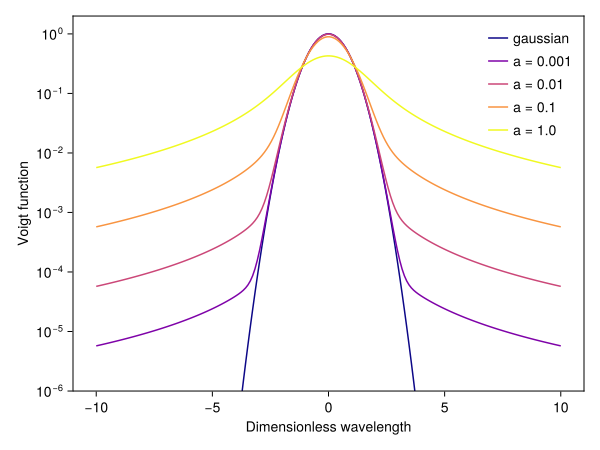

In [3]:
u = LinRange(-10, 10, 200)
a = logrange(1e-3, 1e0, 4)

f = Figure()
ax = Axis(f[1,1], yscale=log10, ylabel="Voigt function", xlabel="Dimensionless wavelength")

cmap = cgrad(:plasma, length(a)+1; categorical=true)

gaussian = exp.(-u .^ 2)
lines!(ax,u,gaussian,label="gaussian",color=cmap[1])

for i in 1:length(a)
    lines!(ax, u, voigt.(a[i], u), color=cmap[i+1], label="a = $(a[i])")
end


ylims!(ax,1e-6,2e0)

axislegend(ax, framevisible = false)

f

# Exercises

* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model for a reference wavelength of 500 nm, writing code for this purpose. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

In [4]:
function reversing_layer(τ, λ0, temp_surface, temp_layer)
    (blackbody(λ0, temp_surface) * exp(-τ) +
              blackbody(λ0, temp_layer) * (1 - exp(-τ)))
end

function blackbody(
        λ::Unitful.Length,
        temp::Unitful.Temperature
) 
    radiation = 2h * c_0^2 * λ^-5 / (exp(h * c_0 / k_B / (λ * temp)) - 1)
    return radiation |> i_units
end

blackbody (generic function with 1 method)

* Study line profiles with different $\tau_0$, using `tau0 = logrange(1e-2, 1e2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? Where do the wings end? For which values of $\tau(0)$ is the layer optically thin and optically thick, at line center? And at $u=5$?

* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center, $I_{u=0}$? Check these values by computing them directly. What happens to these values at other wavelengths?  

* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths (200, 500, and 1000 nm). However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.